In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import phik 
from ydata_profiling import ProfileReport
from matplotlib import pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
pd.options.display.max_columns = None
sklearn.set_config(transform_output='pandas')
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.multiclass import OneVsRestClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier, CatBoostRegressor
import mlflow
from sklearn.impute import KNNImputer

c:\Users\iriivan\Desktop\Projects\machine_learning\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv('data/2023_SouthAsia_MiddleEast_Happiness_Education_Income.csv')
df


,Country,Region,Happiness_Score,GDP_per_Capita_USD,Social_Support,Literacy_Rate(%),Offline_School_Enrollment(%),Online_Education_Access(%),Median_Income_USD,Unemployment_Rate(%),Poverty_Rate(%)
0,India,South Asia,4.036,2450.0,0.797,77.7,73.2,22.5,2340.0,7.6,18.7
1,Pakistan,South Asia,4.516,1590.0,0.708,60.7,63.5,11.8,1560.0,6.5,21.9
2,Bangladesh,South Asia,5.155,2680.0,0.745,75.2,77.1,15.3,2550.0,4.1,14.8
3,Nepal,South Asia,5.269,1380.0,0.731,68.5,66.0,10.4,1300.0,4.3,15.1
4,Sri Lanka,South Asia,4.325,3350.0,0.832,92.3,97.6,18.9,3100.0,5.8,25.6
5,Afghanistan,South Asia,1.859,NaN,0.517,38.1,45.0,2.8,NaN,11.9,55.0
6,Saudi Arabia,Middle East,6.494,24500.0,0.853,98.2,96.0,27.4,26500.0,5.3,12.1
7,United Arab Emirates,Middle East,6.561,44200.0,0.892,94.5,90.2,38.2,41500.0,3.1,4.9
8,Iran,Middle East,4.785,3450.0,0.731,86.3,84.7,24.6,7800.0,10.2,24.7
9,Iraq,Middle East,4.411,5350.0,0.689,80.5,77.5,12.7,5200.0,13.5,18.3


In [4]:

phik_corr = df.phik_matrix()

interval columns not set, guessing: ['Happiness_Score', 'GDP_per_Capita_USD', 'Social_Support', 'Literacy_Rate(%)', 'Offline_School_Enrollment(%)', 'Online_Education_Access(%)', 'Median_Income_USD', 'Unemployment_Rate(%)', 'Poverty_Rate(%)  ']


In [ ]:
# from phik.report import plot_correlation_matrix
# plot_correlation_matrix(
#     phik_corr.values,
#     x_labels=phik_corr.columns,
#     y_labels=phik_corr.index,
#     vmin=0, vmax=1,  # optional; defaults are (-1, +1)
#     title="φ k correlation heat-map"
# )
# plt.show()

In [6]:
df.drop(columns=['GDP_per_Capita_USD'])

,Country,Region,Happiness_Score,Social_Support,Literacy_Rate(%),Offline_School_Enrollment(%),Online_Education_Access(%),Median_Income_USD,Unemployment_Rate(%),Poverty_Rate(%)
0,India,South Asia,4.036,0.797,77.7,73.2,22.5,2340.0,7.6,18.7
1,Pakistan,South Asia,4.516,0.708,60.7,63.5,11.8,1560.0,6.5,21.9
2,Bangladesh,South Asia,5.155,0.745,75.2,77.1,15.3,2550.0,4.1,14.8
3,Nepal,South Asia,5.269,0.731,68.5,66.0,10.4,1300.0,4.3,15.1
4,Sri Lanka,South Asia,4.325,0.832,92.3,97.6,18.9,3100.0,5.8,25.6
5,Afghanistan,South Asia,1.859,0.517,38.1,45.0,2.8,NaN,11.9,55.0
6,Saudi Arabia,Middle East,6.494,0.853,98.2,96.0,27.4,26500.0,5.3,12.1
7,United Arab Emirates,Middle East,6.561,0.892,94.5,90.2,38.2,41500.0,3.1,4.9
8,Iran,Middle East,4.785,0.731,86.3,84.7,24.6,7800.0,10.2,24.7
9,Iraq,Middle East,4.411,0.689,80.5,77.5,12.7,5200.0,13.5,18.3


In [ ]:
# sns.histplot(df['Median_Income_USD'])


In [ ]:
# sns.boxplot(df['Median_Income_USD'])


In [ ]:
# df[df['Median_Income_USD'] > 30000]


In [ ]:
# profile = ProfileReport(df)
# profile.to_file(output_file='output.html')

In [11]:
cat_cols = df.select_dtypes(include='object')
cat_cols

,Country,Region
0,India,South Asia
1,Pakistan,South Asia
2,Bangladesh,South Asia
3,Nepal,South Asia
4,Sri Lanka,South Asia
5,Afghanistan,South Asia
6,Saudi Arabia,Middle East
7,United Arab Emirates,Middle East
8,Iran,Middle East
9,Iraq,Middle East


In [12]:
cat_cols['Country'].nunique()

14

In [13]:
X = df.drop(columns=['Social_Support'])
y = df['Social_Support']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [14]:
ohe_cols = ['Region']
orn_cols = ['Country']
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

In [38]:
ohe_pipe = Pipeline([
    ('ohe', OneHotEncoder(sparse_output=False))
])
orn_pipe = Pipeline([
    ('orn',OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])
num_pipe = Pipeline([
    ('num_cols', PowerTransformer()),
    ('imputer', KNNImputer())
])
transform = ColumnTransformer([
    ('ohe', ohe_pipe, ohe_cols), 
    ('orn', orn_pipe, orn_cols),
    ('num', num_pipe, num_cols)
])

xgb_model = Pipeline([
    ('transform', transform),
    ('model', xgb.XGBRegressor())
    # ('model', DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=18, ccp_alpha=0.00002))
])


In [40]:
ohe_pipe = Pipeline([
    ('ohe', OneHotEncoder(sparse_output=False))
])
orn_pipe = Pipeline([
    ('orn',OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])
num_pipe = Pipeline([
    ('num_cols', PowerTransformer())
])
transform = ColumnTransformer([
    ('ohe', ohe_pipe, ohe_cols), 
    ('orn', orn_pipe, orn_cols),
    ('num', num_pipe, num_cols)
])

cbc = Pipeline([
    ('transform', transform),
    ('model', CatBoostRegressor())
    # ('model', DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=18, ccp_alpha=0.00002))
])


In [42]:
ohe_pipe = Pipeline([
    ('ohe', OneHotEncoder(sparse_output=False))
])
orn_pipe = Pipeline([
    ('orn',OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])
num_pipe = Pipeline([
    ('num_cols', PowerTransformer())
])
transform = ColumnTransformer([
    ('ohe', ohe_pipe, ohe_cols), 
    ('orn', orn_pipe, orn_cols),
    ('num', num_pipe, num_cols)
])

mlgb = Pipeline([
    ('transform', transform),
    ('model', lgb.LGBMRegressor())
    # ('model', DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=18, ccp_alpha=0.00002))
])


In [43]:
xgb_model.fit(X_train, y_train)
cbc.fit(X_train, y_train)
mlgb.fit(X_train, y_train)

Learning rate set to 0.020078
0:	learn: 0.1264323	total: 612us	remaining: 612ms
1:	learn: 0.1256847	total: 1.05ms	remaining: 522ms
2:	learn: 0.1248523	total: 1.41ms	remaining: 469ms
3:	learn: 0.1241051	total: 1.71ms	remaining: 425ms
4:	learn: 0.1233981	total: 2.14ms	remaining: 426ms
5:	learn: 0.1226015	total: 2.48ms	remaining: 411ms
6:	learn: 0.1219237	total: 2.95ms	remaining: 419ms
7:	learn: 0.1212595	total: 3.25ms	remaining: 403ms
8:	learn: 0.1205735	total: 3.7ms	remaining: 407ms
9:	learn: 0.1198879	total: 4.16ms	remaining: 412ms
10:	learn: 0.1190379	total: 6.5ms	remaining: 585ms
11:	learn: 0.1184249	total: 7.4ms	remaining: 610ms
12:	learn: 0.1177814	total: 8.25ms	remaining: 626ms
13:	learn: 0.1170098	total: 8.7ms	remaining: 612ms
14:	learn: 0.1163481	total: 9.31ms	remaining: 611ms
15:	learn: 0.1156087	total: 9.65ms	remaining: 593ms
16:	learn: 0.1150014	total: 10ms	remaining: 578ms
17:	learn: 0.1143326	total: 10.5ms	remaining: 572ms
18:	learn: 0.1136863	total: 10.9ms	remaining: 560ms

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['Region']),
                                                 ('orn',
                                                  Pipeline(steps=[('orn',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Country']),
                                                 ('num',
                                                  Pipeline(steps=[('num_cols',
                                                                   PowerTransformer())]),
                                                  Index(['Happiness_Score', 'GDP_per_Capita_USD', 'Literacy_Rate(%)',
       'Offline_School_Enrollment(%)', 'Online_Education_Access(%)',
       'Median_Income_USD', 'Unemployment_Rate(%)', 'Poverty_Rate(%)  '],
      dtype='object'))])),
                ('model', LGBMRegressor())])

In [44]:
pred_xgb = xgb_model.predict(X_test)
pred_pcp = cbc.predict(X_test)
pred_mlgb = mlgb.predict(X_test)

In [46]:
mae_xgb = abs(y_test-pred_xgb).mean()
mae_cbc = abs(y_test-pred_pcp).mean()
mae_lgb = abs(y_test-pred_mlgb).mean()

print(f'''
xgb_model: {mae_xgb}

pcp_model: {mae_cbc}

lgb_model: {mae_lgb}
 ''')


xgb_model: 0.11780549494425459

pcp_model: 0.038294289473201126

lgb_model: 0.04063636018290669
 


In [50]:
mape_xgb = (abs(y_test-pred_xgb)/y_test).mean()
mape_cbc = (abs(y_test-pred_pcp)/y_test).mean()
mape_lgb = (abs(y_test-pred_mlgb)/y_test).mean()

print(f'''
xgb_model: {mape_xgb}

pcp_model: {mape_cbc}

lgb_model: {mape_lgb}
 ''')



xgb_model: 0.15176540392296758

pcp_model: 0.0495673269396516

lgb_model: 0.055070160749630594
 


In [51]:
mse_xgb = ((y_test-pred_xgb)**2).mean()
mse_cbc = ((y_test-pred_pcp)**2).mean()
mse_lgb = ((y_test-pred_mlgb)**2).mean()

print(f'''
xgb_model: {mse_xgb}

pcp_model: {mse_cbc}

lgb_model: {mse_lgb}
 ''')



xgb_model: 0.027325497021439837

pcp_model: 0.0023652107295209245

lgb_model: 0.0020196445885415047
 


In [52]:
rmse_xgb = ((y_test-pred_xgb)**2).mean()**0.5
rmse_cbc = ((y_test-pred_pcp)**2).mean()**0.5
rmse_lgb = ((y_test-pred_mlgb)**2).mean()**0.5

print(f'''
xgb_model: {rmse_xgb}

pcp_model: {rmse_cbc}

lgb_model: {rmse_lgb}
 ''')


xgb_model: 0.16530425590843037

pcp_model: 0.04863343222024253

lgb_model: 0.044940456033973494
 


In [53]:
r2_xgb = r2_score(y_test,pred_xgb)
r2_cbc = r2_score(y_test,pred_pcp)
r2_lgb = r2_score(y_test,pred_mlgb)

print(f'''
xgb_model: {r2_xgb}

pcp_model: {r2_cbc}

lgb_model: {r2_lgb}
 ''')


xgb_model: -12.554313998730052

pcp_model: -0.17321960789728208

lgb_model: -0.0018078316178080645
 


In [20]:
# ohe = OneHotEncoder(sparse_output=False)
# ohe.fit(X_train[ohe_cols])
# X_train_ohe = ohe.transform(X_train[ohe_cols])
# X_train[X_train_ohe.columns] = X_train_ohe
# X_test_ohe = ohe.transform(X_test[ohe_cols])
# X_test[X_test_ohe.columns] = X_test_ohe
# X_train = X_train.drop(columns=ohe_cols)
# X_test = X_test.drop(columns=ohe_cols)



In [21]:
# orn = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
# orn.fit(X_train[orn_cols])
# X_train[orn_cols] = orn.transform(X_train[orn_cols])
# X_test[orn_cols] = orn.transform(X_test[orn_cols])

In [22]:
# pt = PowerTransformer()
# pt.fit(X_train[num_cols])
# X_train[num_cols] = pt.transform(X_train[num_cols])
# X_test[num_cols] = pt.transform(X_test[num_cols])


In [23]:
# X_train 

In [24]:
# dt = DecisionTreeRegressor()
# dt.fit(X_train,y_train)

In [25]:
# plt.figure(figsize=(20,10))
# plot_tree(dt, filled=True, fontsize=6)
# plt.show()

In [27]:
mae = abs(y_test-pred).mean()
mae

np.float64(0.04063636018290669)

In [28]:
mape = (abs((y_test-pred)/y_test)).mean() #%
mape

np.float64(0.055070160749630594)

In [29]:
mse = ((y_test-pred)**2).mean() 
mse #когда уменьшается mse, то mae становится выше 

np.float64(0.0020196445885415047)

In [30]:
rmse = (((y_test-pred)**2).mean())**0.5
rmse

np.float64(0.044940456033973494)

In [31]:
r2 = r2_score(y_test, pred) #formul
r2 #насколько хорошо модель работает, чем среднее 

-0.0018078316178080645

In [32]:
0.6*0.6*0.6 + 0.6*0.6*0.4*3  

0.6479999999999999

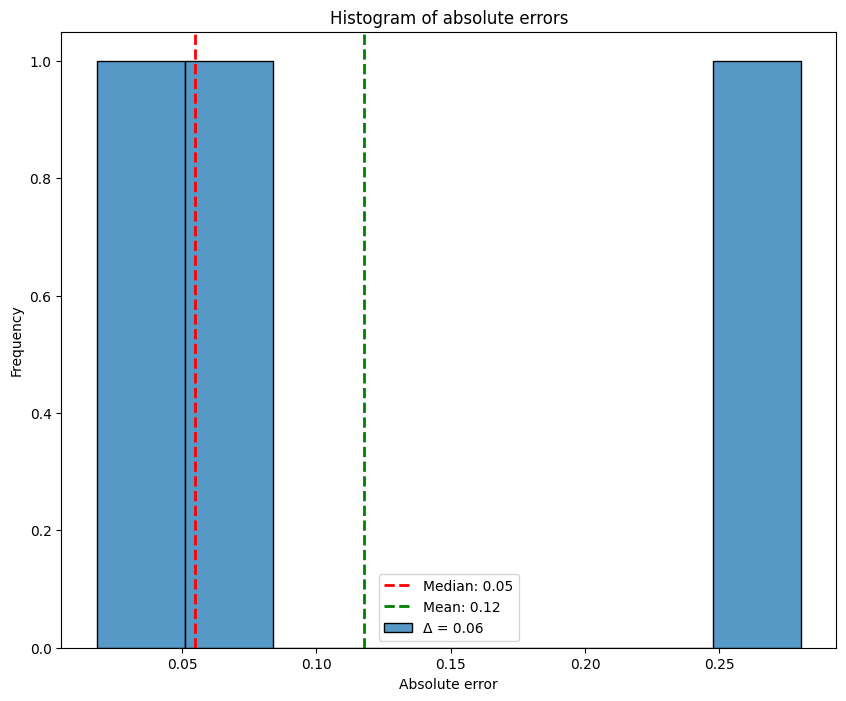

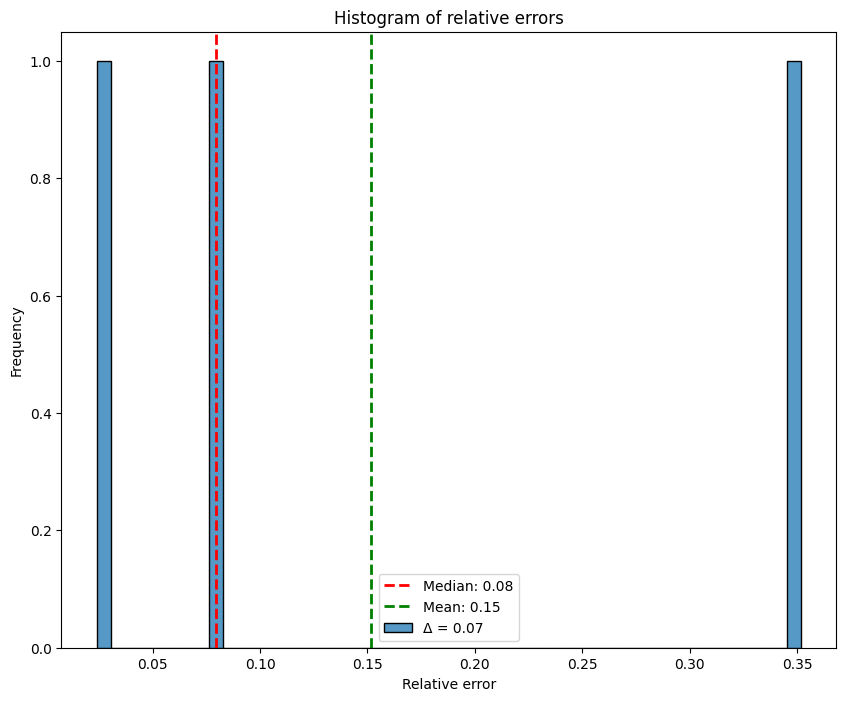

In [54]:
# XGBoost
abs_error = np.abs(y_test - pred_xgb)
rel_error = np.abs(y_test - pred_xgb) / y_test

# calculating means and medians of each type of errors.
med_abs = np.median(abs_error)
mean_abs = np.mean(abs_error)
med_rel = np.median(rel_error)
mean_rel = np.mean(rel_error)

# for absolute errors
plt.figure(figsize=(10, 8))
sns.histplot(abs_error,bins=8)
distance = abs(med_abs - mean_abs) 

plt.axvline(med_abs, color='red', linestyle='dashed', linewidth=2, label=f'Медиана: {med_abs:.2f}')
plt.axvline(mean_abs, color='green', linestyle='dashed', linewidth=2, label=f'Среднее: {mean_abs:.2f}')
  
plt.xlabel("Absolute error")
plt.ylabel("Frequency")
plt.title("Histogram of absolute errors")
plt.legend([f'Median: {med_abs:.2f}', f'Mean: {mean_abs:.2f}', f'Δ = {distance:.2f}'])
plt.show()

# for relative errors
plt.figure(figsize=(10, 8))
sns.histplot(rel_error,bins=50)
distance = abs(med_rel - mean_rel) 

plt.axvline(med_rel, color='red', linestyle='dashed', linewidth=2, label=f'Median: {med_rel:.2f}')
plt.axvline(mean_rel, color='green', linestyle='dashed', linewidth=2, label=f'Mean: {mean_rel:.2f}')

plt.xlabel("Relative error")
plt.ylabel("Frequency")
plt.title("Histogram of relative errors")
plt.legend([f'Median: {med_rel:.2f}', f'Mean: {mean_rel:.2f}', f'Δ = {distance:.2f}'])
plt.show()

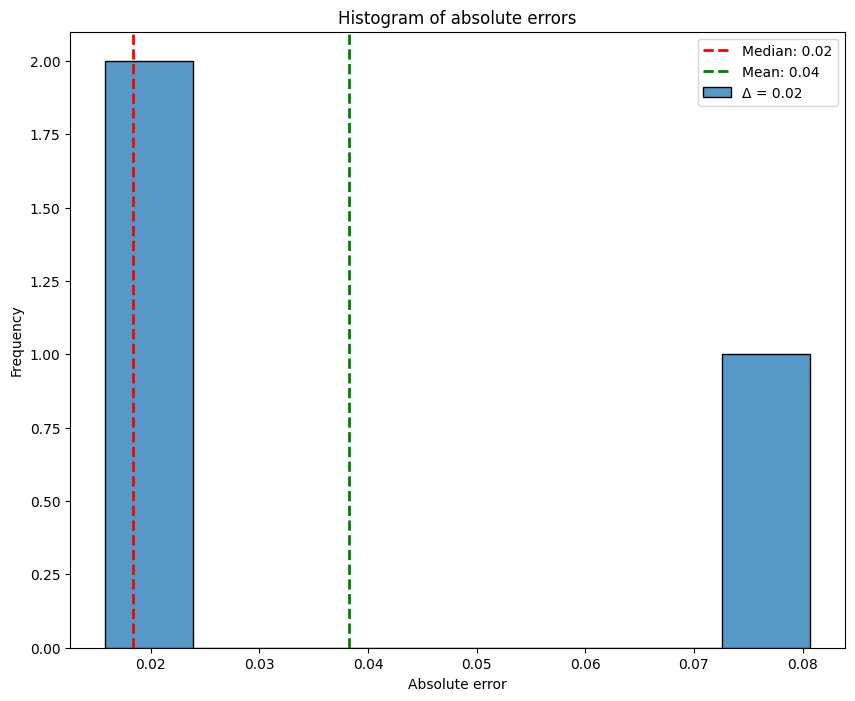

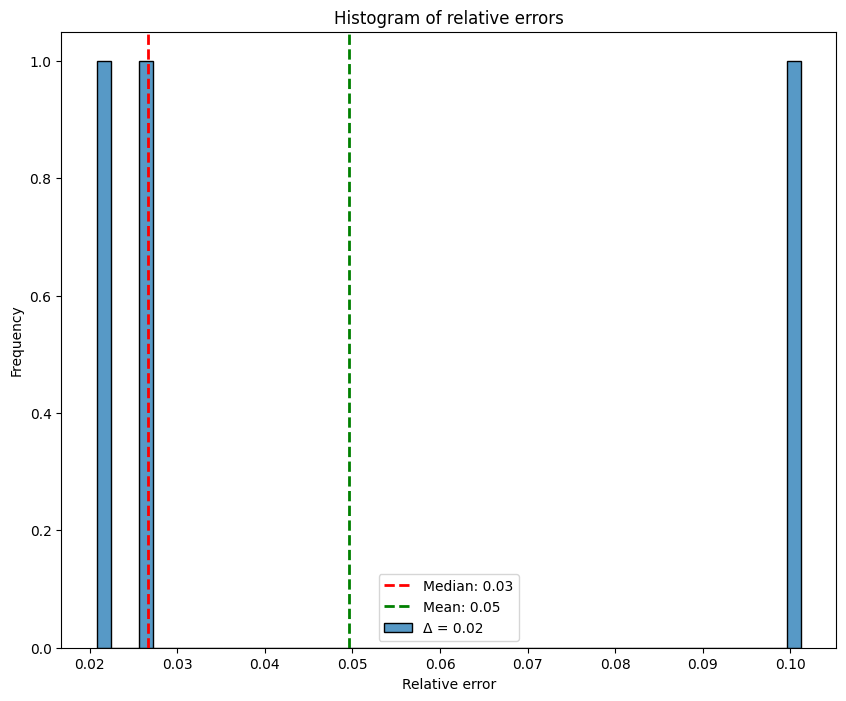

In [55]:
# catboost
abs_error = np.abs(y_test - pred_pcp)
rel_error = np.abs(y_test - pred_pcp) / y_test

# calculating means and medians of each type of errors.
med_abs = np.median(abs_error)
mean_abs = np.mean(abs_error)
med_rel = np.median(rel_error)
mean_rel = np.mean(rel_error)

# for absolute errors
plt.figure(figsize=(10, 8))
sns.histplot(abs_error,bins=8)
distance = abs(med_abs - mean_abs) 

plt.axvline(med_abs, color='red', linestyle='dashed', linewidth=2, label=f'Медиана: {med_abs:.2f}')
plt.axvline(mean_abs, color='green', linestyle='dashed', linewidth=2, label=f'Среднее: {mean_abs:.2f}')
  
plt.xlabel("Absolute error")
plt.ylabel("Frequency")
plt.title("Histogram of absolute errors")
plt.legend([f'Median: {med_abs:.2f}', f'Mean: {mean_abs:.2f}', f'Δ = {distance:.2f}'])
plt.show()

# for relative errors
plt.figure(figsize=(10, 8))
sns.histplot(rel_error,bins=50)
distance = abs(med_rel - mean_rel) 

plt.axvline(med_rel, color='red', linestyle='dashed', linewidth=2, label=f'Median: {med_rel:.2f}')
plt.axvline(mean_rel, color='green', linestyle='dashed', linewidth=2, label=f'Mean: {mean_rel:.2f}')

plt.xlabel("Relative error")
plt.ylabel("Frequency")
plt.title("Histogram of relative errors")
plt.legend([f'Median: {med_rel:.2f}', f'Mean: {mean_rel:.2f}', f'Δ = {distance:.2f}'])
plt.show()

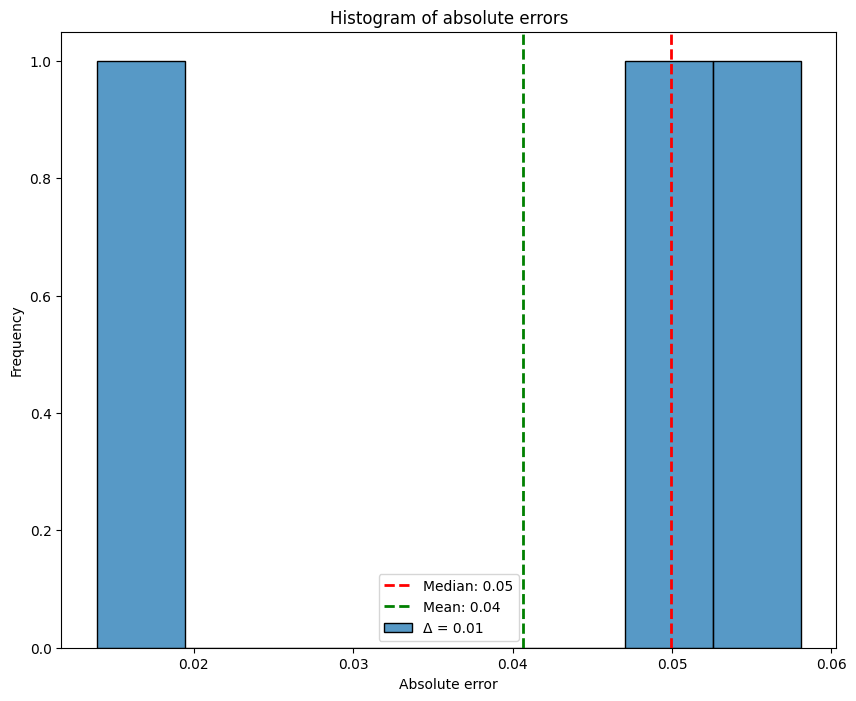

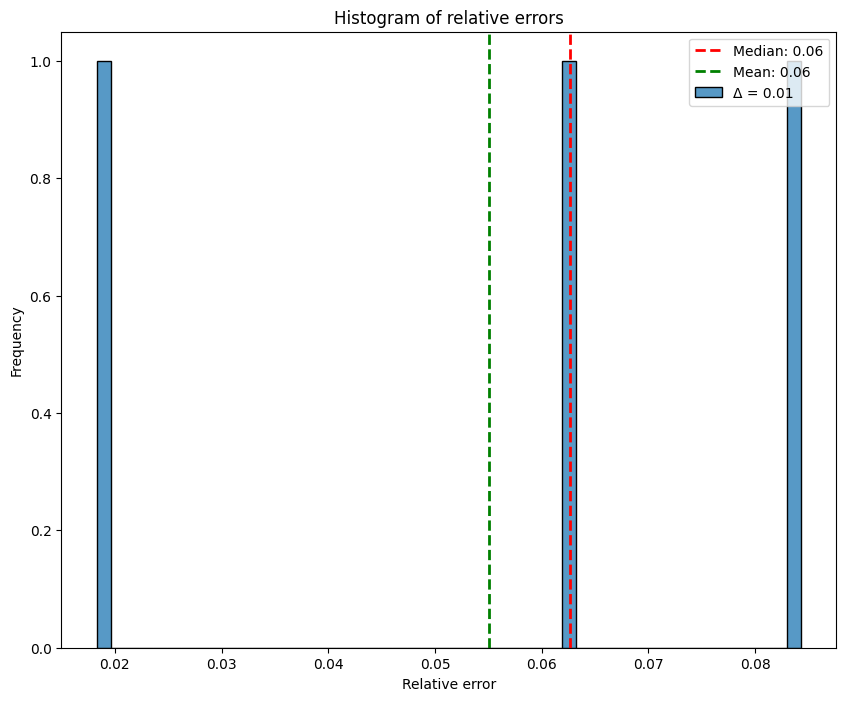

In [56]:
# Mlgb
abs_error = np.abs(y_test - pred_mlgb)
rel_error = np.abs(y_test - pred_mlgb) / y_test

# calculating means and medians of each type of errors.
med_abs = np.median(abs_error)
mean_abs = np.mean(abs_error)
med_rel = np.median(rel_error)
mean_rel = np.mean(rel_error)

# for absolute errors
plt.figure(figsize=(10, 8))
sns.histplot(abs_error,bins=8)
distance = abs(med_abs - mean_abs) 

plt.axvline(med_abs, color='red', linestyle='dashed', linewidth=2, label=f'Медиана: {med_abs:.2f}')
plt.axvline(mean_abs, color='green', linestyle='dashed', linewidth=2, label=f'Среднее: {mean_abs:.2f}')
  
plt.xlabel("Absolute error")
plt.ylabel("Frequency")
plt.title("Histogram of absolute errors")
plt.legend([f'Median: {med_abs:.2f}', f'Mean: {mean_abs:.2f}', f'Δ = {distance:.2f}'])
plt.show()

# for relative errors
plt.figure(figsize=(10, 8))
sns.histplot(rel_error,bins=50)
distance = abs(med_rel - mean_rel) 

plt.axvline(med_rel, color='red', linestyle='dashed', linewidth=2, label=f'Median: {med_rel:.2f}')
plt.axvline(mean_rel, color='green', linestyle='dashed', linewidth=2, label=f'Mean: {mean_rel:.2f}')

plt.xlabel("Relative error")
plt.ylabel("Frequency")
plt.title("Histogram of relative errors")
plt.legend([f'Median: {med_rel:.2f}', f'Mean: {mean_rel:.2f}', f'Δ = {distance:.2f}'])
plt.show()

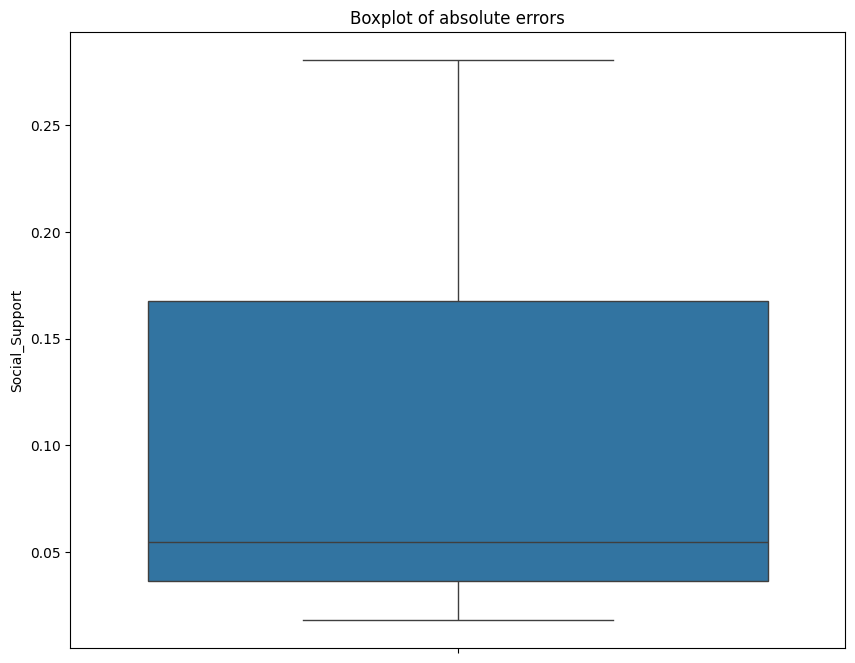

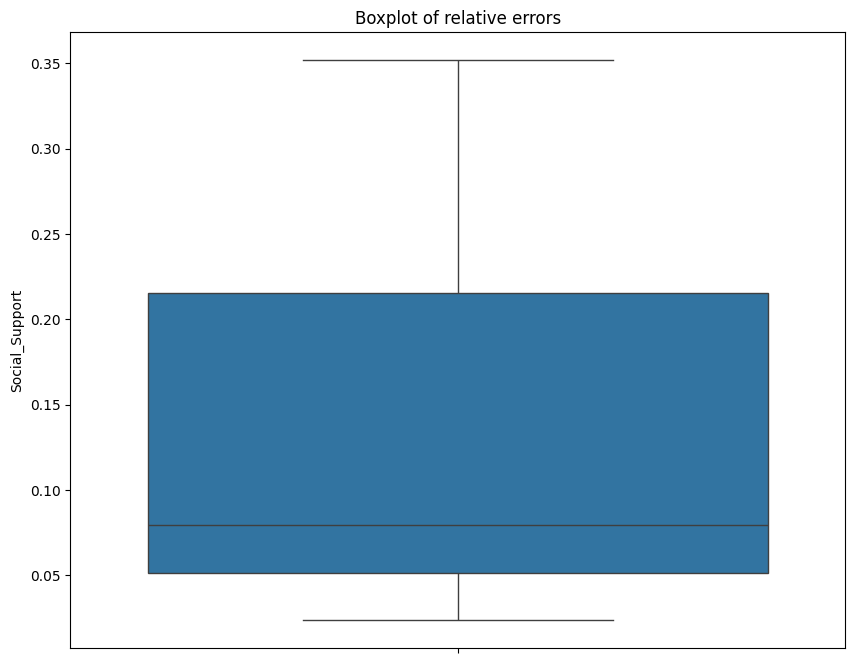

In [59]:
# counting the errors, relative and absolute ones.
abs_error = np.abs(y_test - pred_xgb)
rel_error = np.abs(y_test - pred_xgb) / y_test

# for absolute errors
plt.figure(figsize=(10, 8))
sns.boxplot(abs_error)
distance = abs(med_abs - mean_abs) 


plt.title("Boxplot of absolute errors")
plt.show()

# for relative errors
plt.figure(figsize=(10, 8))
sns.boxplot(rel_error)
distance = abs(med_rel - mean_rel) 

plt.title("Boxplot of relative errors")
plt.show()

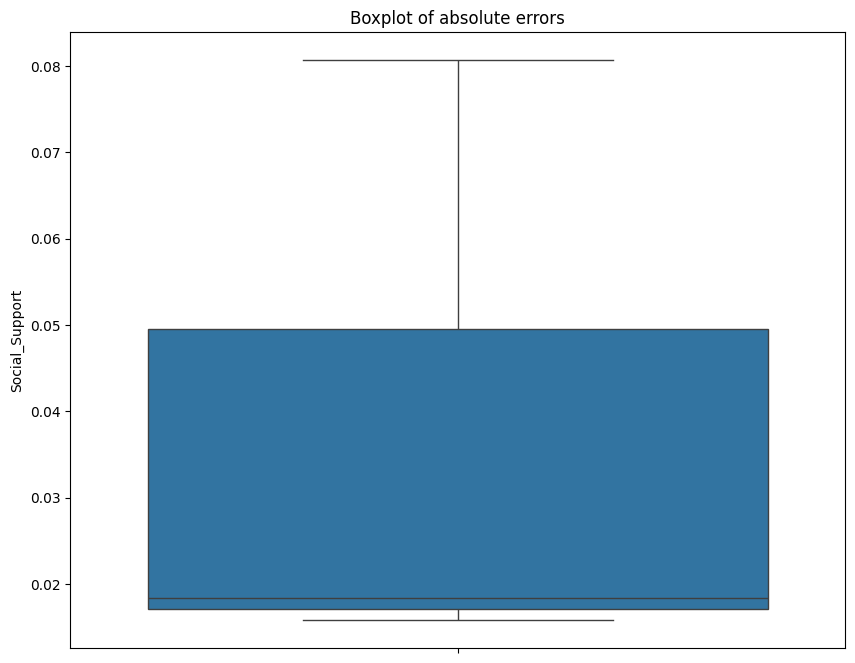

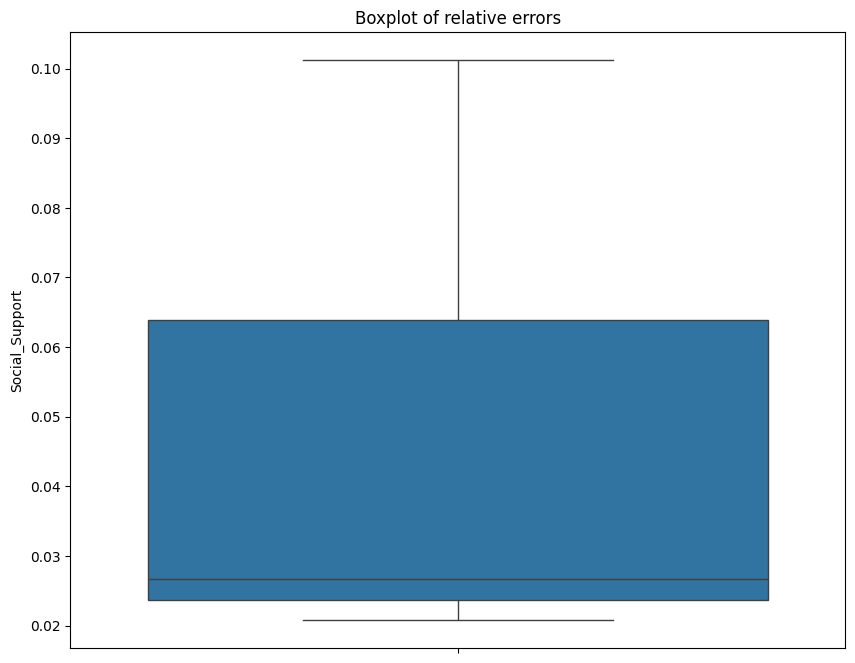

In [60]:
# counting the errors, relative and absolute ones.
abs_error = np.abs(y_test - pred_pcp)
rel_error = np.abs(y_test - pred_pcp) / y_test

# for absolute errors
plt.figure(figsize=(10, 8))
sns.boxplot(abs_error)
distance = abs(med_abs - mean_abs) 


plt.title("Boxplot of absolute errors")
plt.show()

# for relative errors
plt.figure(figsize=(10, 8))
sns.boxplot(rel_error)
distance = abs(med_rel - mean_rel) 

plt.title("Boxplot of relative errors")
plt.show()

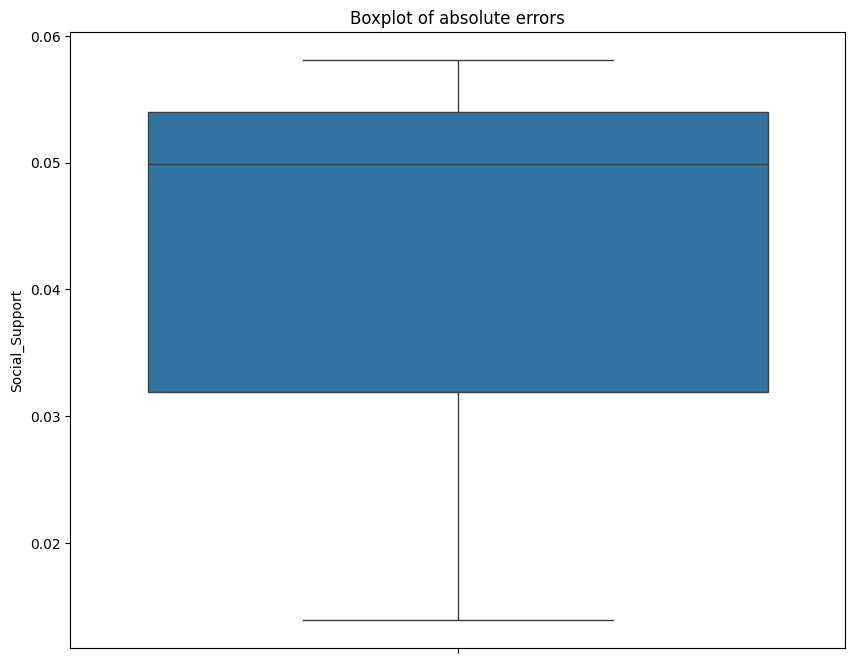

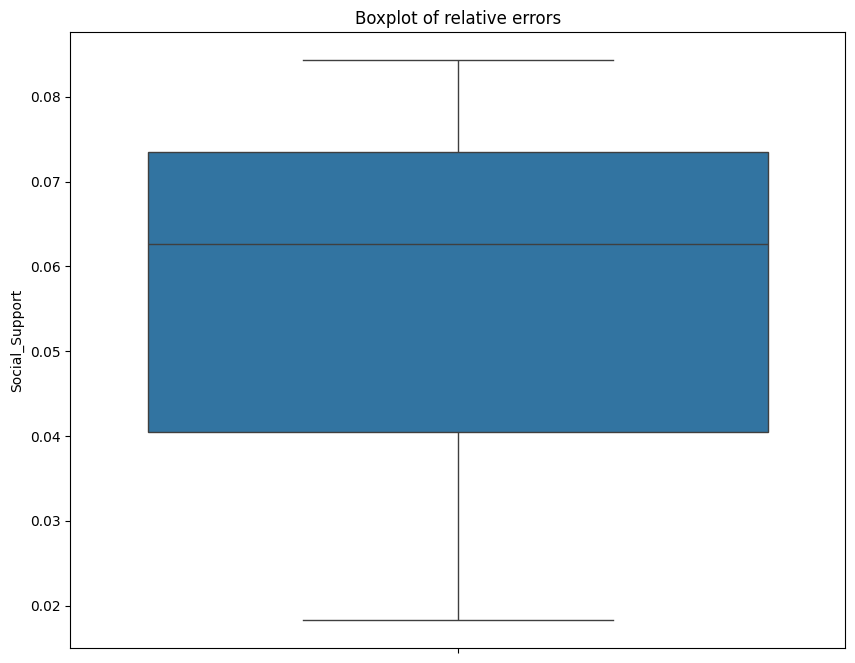

In [61]:
# counting the errors, relative and absolute ones.
abs_error = np.abs(y_test - pred_mlgb)
rel_error = np.abs(y_test - pred_mlgb) / y_test

# for absolute errors
plt.figure(figsize=(10, 8))
sns.boxplot(abs_error)
distance = abs(med_abs - mean_abs) 


plt.title("Boxplot of absolute errors")
plt.show()

# for relative errors
plt.figure(figsize=(10, 8))
sns.boxplot(rel_error)
distance = abs(med_rel - mean_rel) 

plt.title("Boxplot of relative errors")
plt.show()

In [66]:
mlflow.set_experiment('model')
with mlflow.start_run(run_name='xgb'):
    mlflow.log_metric('mae',mae_xgb)
    mlflow.log_metric('mse',mse_xgb)
    mlflow.log_metric('r2',r2_xgb)
    mlflow.log_metric('mape',mape_xgb)
    mlflow.log_metric('rmse',rmse_xgb)

In [67]:
mlflow.set_experiment('model')
with mlflow.start_run(run_name='pcp'):
    mlflow.log_metric('mae',mae_cbc)
    mlflow.log_metric('mse',mse_cbc)
    mlflow.log_metric('r2',r2_cbc)
    mlflow.log_metric('mape',mape_cbc)
    mlflow.log_metric('rmse',rmse_cbc)


In [68]:

with mlflow.start_run(run_name='mlgb'):
    mlflow.log_metric('mae',mae_lgb)
    mlflow.log_metric('mse',mse_lgb)
    mlflow.log_metric('r2',r2_lgb)
    mlflow.log_metric('mape',mape_lgb)
    mlflow.log_metric('rmse',rmse_lgb)